# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the [S&P 500](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) using a dataset of past prices


## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from google finance

In [34]:
import pandas as pd
import datetime
import yfinance as yf


# def get_historical_data(symbol,start_date,end_date):
#     ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
#     symbol = symbol.upper()
#     start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
#     end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
#     url_string = "http://www.google.com/finance/historical?q={0}".format(symbol)
#     url_string += "&startdate={0}&enddate={1}&num={0}&ei=KKltWZHCBNWPuQS9147YBw&output=csv".format(start.strftime('%b%d,%Y'), end.strftime('%b%d,%Y'),4000)
    
#     col_names = ['Date','Open','High','Low','Close','Volume']
#     stocks = pd.read_csv(url_string, header=0, names=col_names) 
    
#     df = pd.DataFrame(stocks)
#     return df
def get_historical_data(symbol, start_date, end_date):
    """
    Fetches historical stock data using the yfinance library.
    
    Args:
        symbol (str): Stock ticker symbol (e.g., 'GOOGL').
        start_date (str): Start date in 'yyyy-mm-dd' format.
        end_date (str): End date in 'yyyy-mm-dd' format.
    
    Returns:
        pd.DataFrame: A DataFrame containing historical stock data.
    """
    symbol = symbol.upper()
    data = yf.download(symbol, start=start_date, end=end_date)
    data.reset_index(inplace=True)  # Move the Date from the index to a column
    return data

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [35]:
data = get_historical_data('GOOGL','2005-01-01','2017-06-30') # from January 1, 2005 to June 30, 2017

[*********************100%***********************]  1 of 1 completed


**Step 3:** Write the data to a csv file.

In [36]:
data.to_csv('google.csv',index = False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [37]:
# import pandas as pd
# import numpy as np

# data = pd.read_csv('google.csv')
# print(data.head())

# print("\n")
# print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
# print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
# print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
# print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
# print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))
import pandas as pd
import numpy as np

# Read the CSV file
try:
    data = pd.read_csv('google.csv')
    print("File loaded successfully!")
except FileNotFoundError:
    print("Error: File 'google.csv' not found. Please check the file path.")
    exit()

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Clean and preprocess the data
# Convert columns to numeric (if they contain strings or invalid values, they will be converted to NaN)
columns_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in the specified columns
# data = data.dropna(subset=columns_to_convert)

if data.empty:
    print("\nError: No valid data after cleaning. Please check the input file.")
    exit()

# Calculate and display statistics
print("\nStatistics:")
for col in columns_to_convert:
    mean_value = np.mean(data[col])
    std_dev = np.std(data[col])
    max_value = np.max(data[col])
    min_value = np.min(data[col])

    print(f"{col.capitalize()} --- Mean: {mean_value:.2f}, Std: {std_dev:.2f}, Max: {max_value:.2f}, Min: {min_value:.2f}")


File loaded successfully!

First few rows of the dataset:
         Date              Close               High                Low  \
0         NaN              GOOGL              GOOGL              GOOGL   
1  2005-01-03  5.054499626159668  5.077688553531345  4.873722726031057   
2  2005-01-04  4.849785804748535   5.05998515176159   4.82435338372077   
3  2005-01-05  4.825101852416992  4.909629057209678  4.793185538407283   
4  2005-01-06  4.701425075531006   4.88469444151674  4.680730024126535   

                 Open     Volume  
0               GOOGL      GOOGL  
1   4.922096537991378  633134232  
2     5.0218353324329  549685764  
3     4.8236052406936  329134536  
4  4.8642488253936715  415068516  

Statistics:
Open --- Mean: 19.05, Std: 10.62, Max: 50.09, Min: 4.37
High --- Mean: 19.21, Std: 10.68, Max: 50.25, Min: 4.45
Low --- Mean: 18.86, Std: 10.55, Max: 49.65, Min: 4.30
Close --- Mean: 19.04, Std: 10.62, Max: 50.03, Min: 4.36
Volume --- Mean: 157408524.49, Std: 160104731.53, 

**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [38]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item       Open      Close      Volume
0     0  47.395689  46.721630  64134000.0
1     1  47.361313  47.876942  54912000.0
2     2  47.906339  47.233276  48872000.0
3     3  49.321209  48.428944  30358000.0
4     4  48.598825  49.126411  31280000.0
---
      Item      Open     Close       Volume
3141  3141  4.864249  4.701425  415068516.0
3142  3142  4.823605  4.825102  329134536.0
3143  3143  5.021835  4.849786  549685764.0
3144  3144  4.922097  5.054500  633134232.0
3145  3145       NaN       NaN          NaN


**Step 2: ** Visualise raw data.

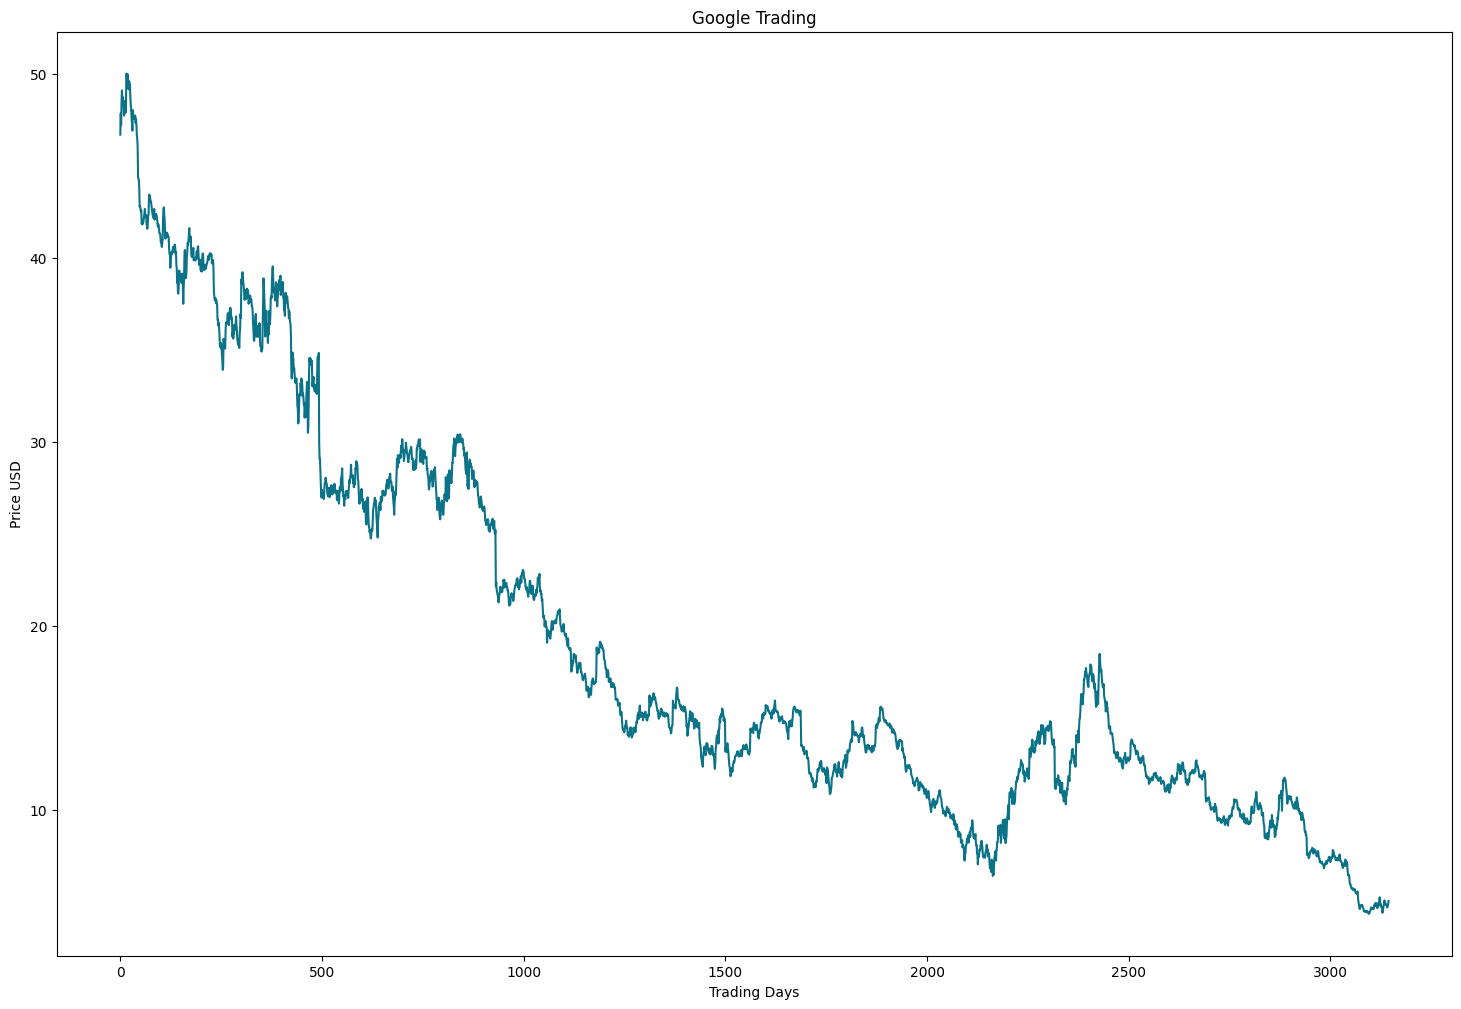

In [39]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [40]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.941008  0.927501  0.032906
1     1  0.940256  0.952798  0.027257
2     2  0.952177  0.938704  0.023557
3     3  0.983122  0.964885  0.012217
4     4  0.967322  0.980157  0.012782


Open   --- mean : 0.3209656922697989   	 Std:  0.23237056237873008   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.321330056511849   	 Std:  0.23259526999532074   	 Max:  0.9999999999999999   	 Min:  0.0
Volume --- mean : 0.09003767253396143   	 Std:  0.0980666545611495   	 Max:  1.0   	 Min:  0.0


**Step 4 :** Visualize the data again

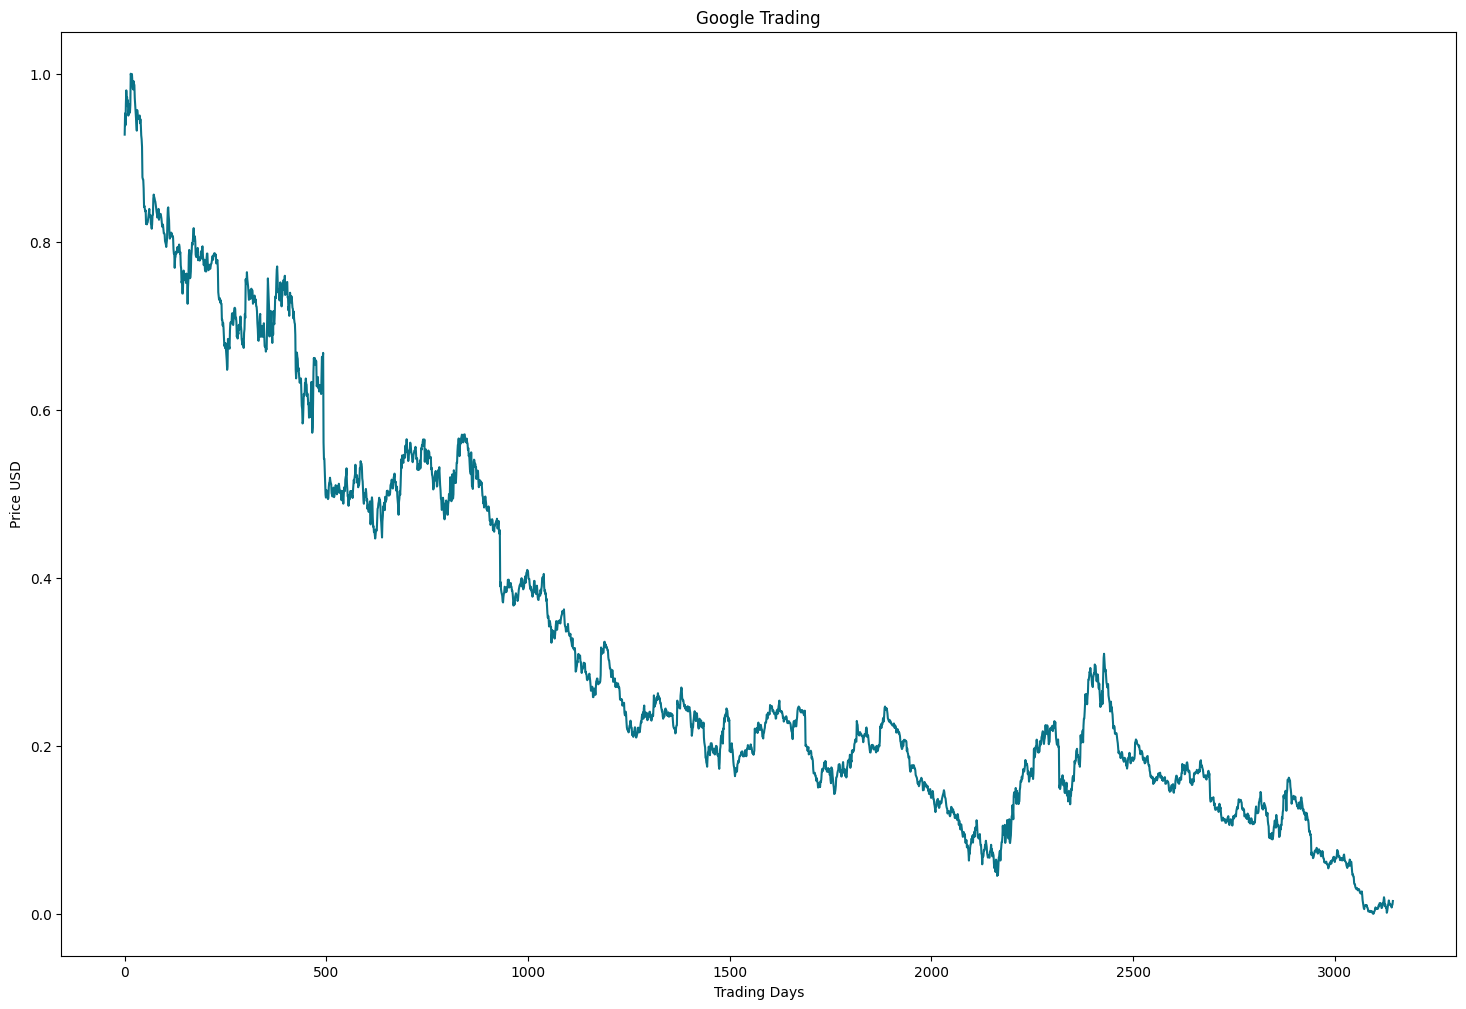

In [41]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [42]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [43]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.941008,0.927501,0.032906
1,1,0.940256,0.952798,0.027257
2,2,0.952177,0.938704,0.023557
3,3,0.983122,0.964885,0.012217
4,4,0.967322,0.980157,0.012782


**Step 2:** Split data into train and test pair

In [44]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2156, 1)
y_train (2156, 1)
x_test (990, 1)
y_test (990, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [45]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [46]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

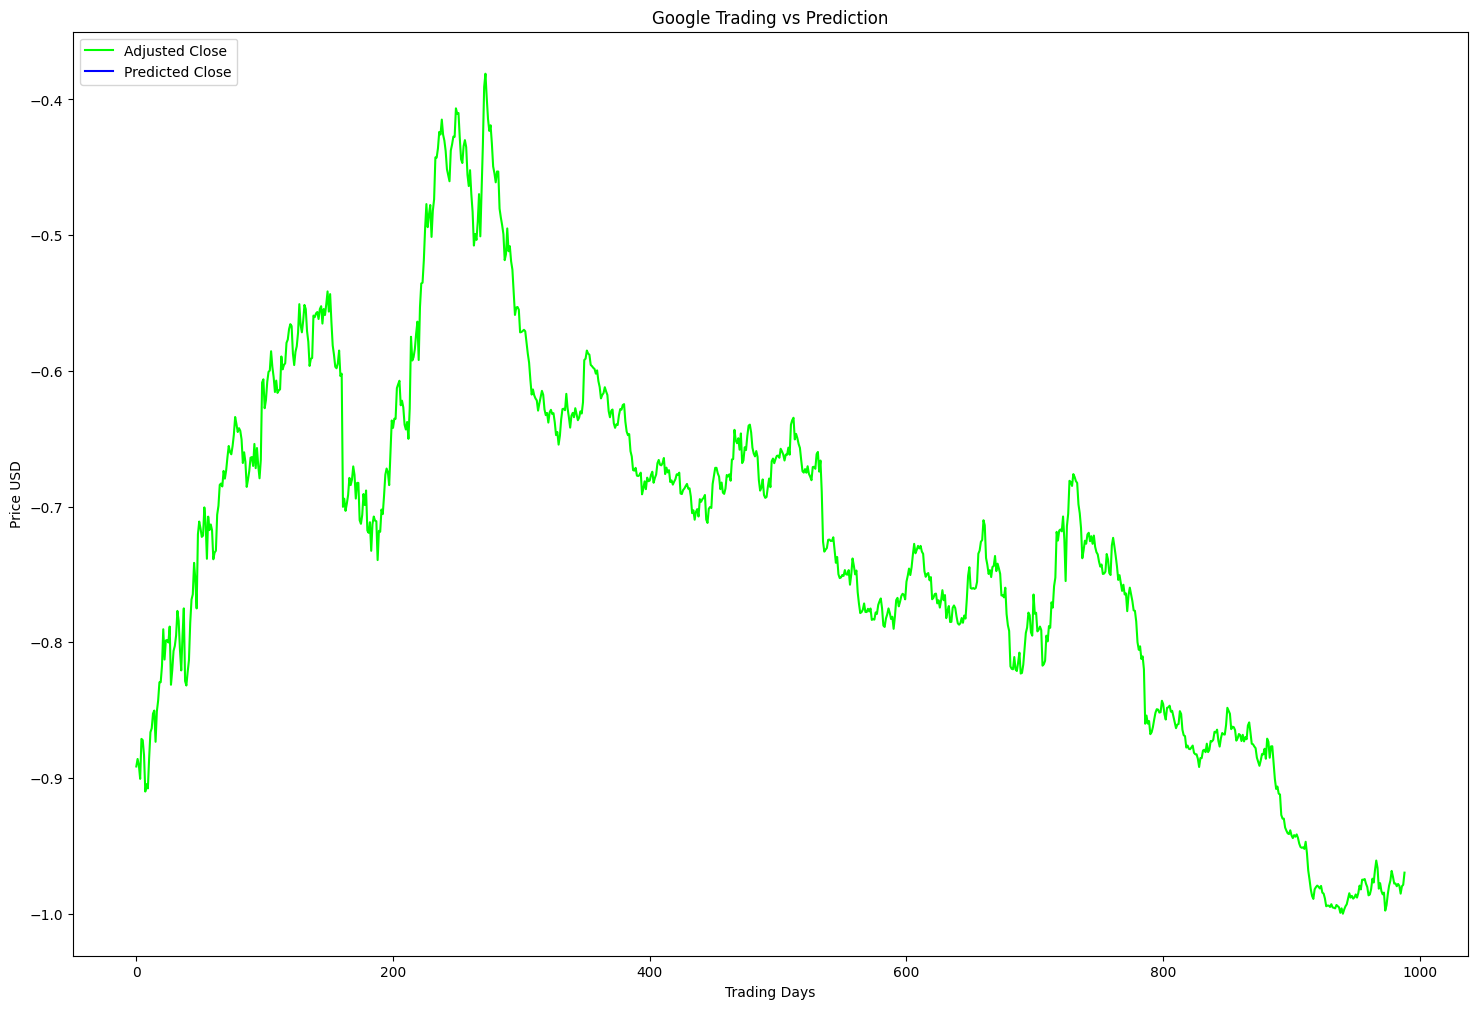

In [47]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [48]:
#test
import numpy as np

# Handle NaN values using NumPy
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train, axis=0))
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))
predictions = np.nan_to_num(predictions, nan=0)
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))



In [49]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.7408 MSE (0.8607 RMSE)
Test Score: 0.54632504 MSE (0.73913804 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [50]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume
0,0.941008,0.927501,0.032906
1,0.940256,0.952798,0.027257
2,0.952177,0.938704,0.023557
3,0.983122,0.964885,0.012217
4,0.967322,0.980157,0.012782


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [51]:
# X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

# unroll_length = 50
# X_train = sd.unroll(X_train, unroll_length)
# X_test = sd.unroll(X_test, unroll_length)
# y_train = y_train[-X_train.shape[0]:]
# y_test = y_test[-X_test.shape[0]:]

# print("x_train", X_train.shape)
# print("y_train", y_train.shape)
# print("x_test", X_test.shape)
# print("y_test", y_test.shape)
# Split the data using the provided function
X_train, X_test, y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

# Unroll data for LSTM (ensure these functions are implemented correctly)
unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)

# Ensure that y_train and y_test match the shape of X_train and X_test
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

# Output the shapes to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2590, 50, 3)
y_train shape: (2590,)
X_test shape: (446, 50, 3)
y_test shape: (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [52]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.009962797164916992


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Step 4:** Train the model

In [53]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0183 - val_loss: 8.8976e-05


**Step 5:** make prediction using test data

In [54]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


**Step 6:** Plot the results

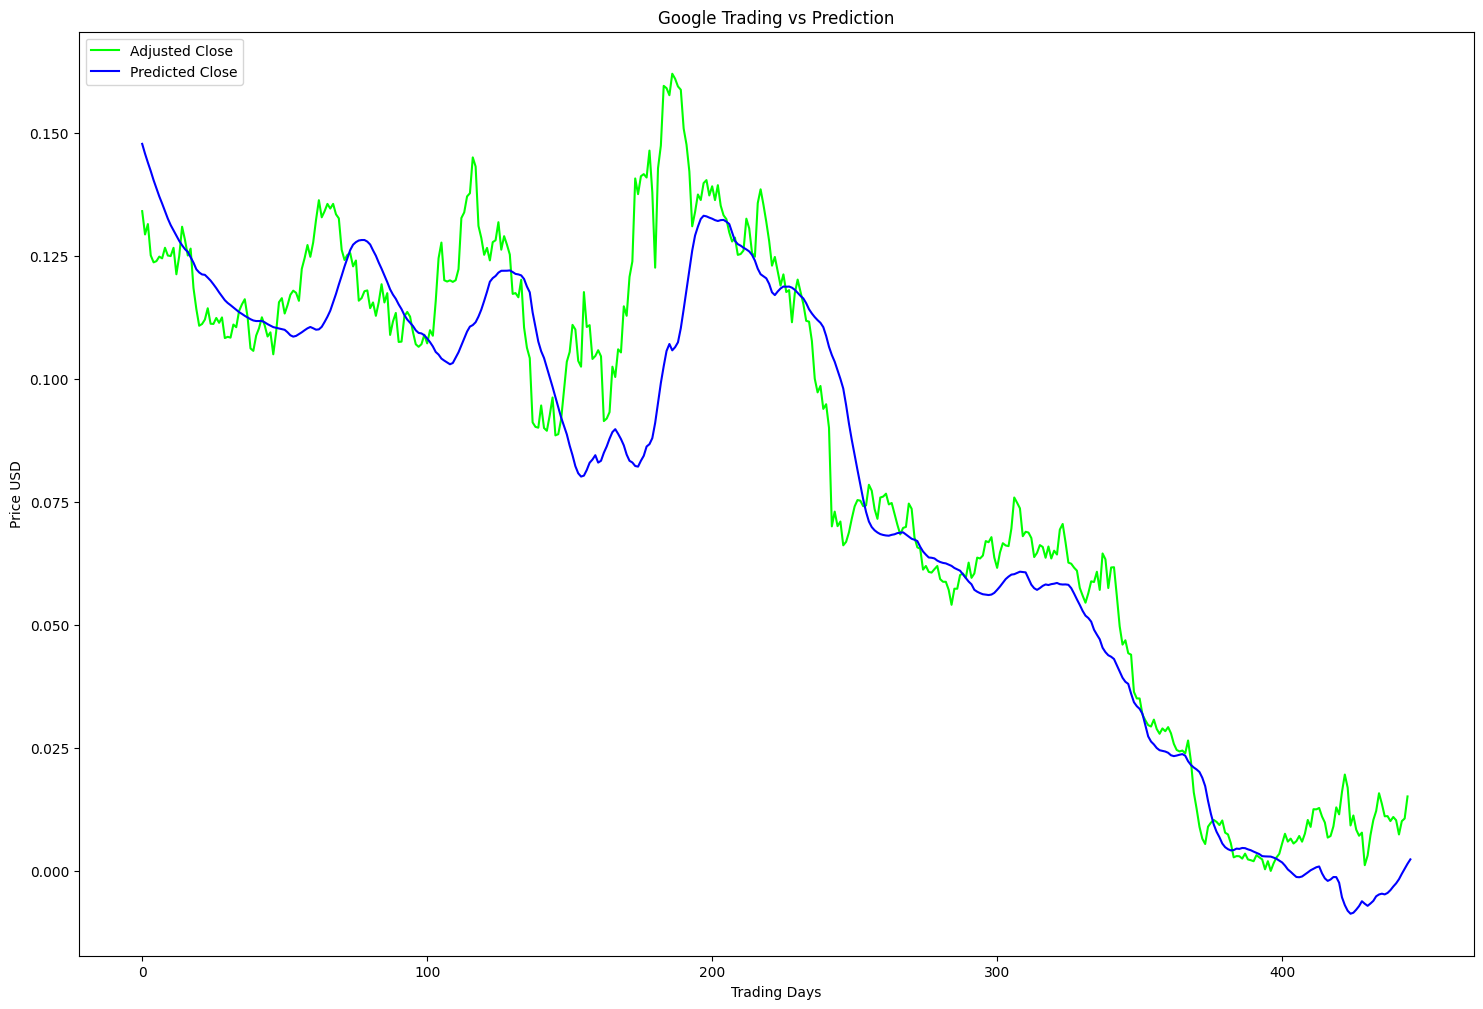

In [55]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [56]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00053711 MSE (0.02317561 RMSE)
Test Score: nan MSE (nan RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [57]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0029921531677246094


**Step 2: ** Train improved LSTM model

In [58]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
25/25 - 7s - 295ms/step - loss: 0.0159 - val_loss: 1.6501e-04
Epoch 2/5
25/25 - 3s - 126ms/step - loss: 0.0020 - val_loss: 2.1416e-04
Epoch 3/5
25/25 - 3s - 119ms/step - loss: 0.0015 - val_loss: 1.0243e-04
Epoch 4/5
25/25 - 3s - 124ms/step - loss: 0.0014 - val_loss: 8.9740e-05
Epoch 5/5
25/25 - 3s - 108ms/step - loss: 0.0014 - val_loss: 9.2678e-05


**Step 3:** Make prediction on improved LSTM model

In [59]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


**Step 4:** plot the results

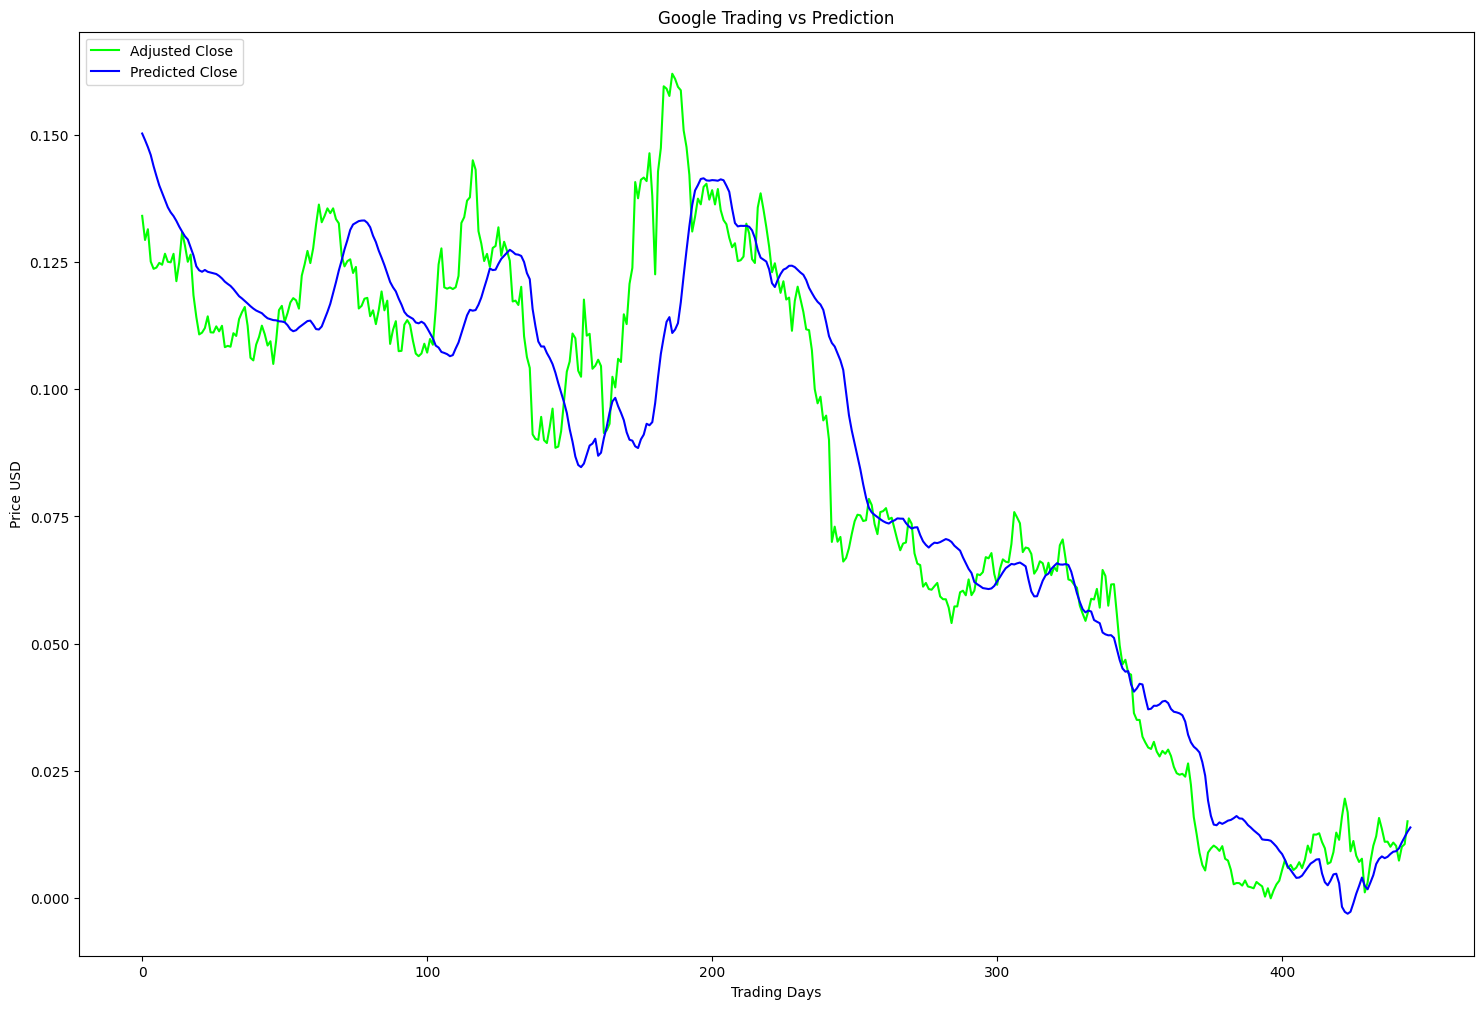

In [60]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [61]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00049873 MSE (0.02233235 RMSE)
Test Score: nan MSE (nan RMSE)


In [62]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: nan - RMSE * Adjusted Close Range


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [64]:
import preprocess_data as ppd

data = pd.read_csv('googl.csv')

# Preprocess the data
stocks = ppd.remove_data(data)
stocks = ppd.get_normalised_data(stocks)

# Drop the 'Item' column
stocks = stocks.drop(['Item'], axis=1)

# Print the dataframe head
print(stocks.head())

# Convert DataFrame to NumPy arrays
X = stocks.values  # Use .values to get NumPy array from DataFrame
Y = stocks['Close'].to_numpy()  # Use .to_numpy() to get NumPy array for 'Close' column

# Unroll the data for LSTM (ensure 'sd.unroll' is defined correctly)
X = sd.unroll(X, 1)
Y = Y[-X.shape[0]:]

# Print the shapes of X and Y to verify
print(X.shape)
print(Y.shape)

# Generate predictions (ensure the model is defined and trained)
predictions = model.predict(X)

# Get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.123901  0.000000  0.606442
1  0.000000  0.174601  1.000000
2  0.010989  0.112263  0.921928
3  0.093132  0.291229  0.575381
4  0.243819  0.430228  0.366556
(12, 1, 3)
(12,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
Test Score: 0.4002 MSE (0.6326 RMSE)
